# Olympic Games Exploratory Data Analysis

Before we begin, let's set up some useful settings:
- Max number of columns to be displayed = 100
- Max number of columns to be displayed = 100

In [4]:
import pandas as pd

pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100) 

### First step: read and glimpse the dataset

In this EDA, we'll use the ["120 years of Olympic history: athletes and results"](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) Kaggle dataset, locally available in this repo in  `raw_data\athlete_events.csv` . 

Let's first read the dataset:

In [5]:
df = pd.read_csv("raw_data/athlete_events.csv")

### Q0: How many rows and columns are there in this dataset?


In [6]:
print(df.shape)

(271116, 15)


Over 271 thousand competitors in the last 120 years of Olympics! Wow!



Let's get some basic info on the available data:

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None


Lots of infos available! Let's take a glimpse on actual data:

In [8]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Each row represents a competitor in a specific event from a specific olympic games. Interesting, very interesting.

### Q1: Which are the oldest olympic summer and winter games with data available in the dataset?

To solve this one, we may resort to the `np.sort()` function:


In [9]:
import numpy as np

np.sort(df['Year'].unique()) # .unique() to return only one ocurrence for each olympic year

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

The first olympic game with data available is actually the first one in modern age, 1896 Olympic Summer games, in Athens. 



### Q2: Which game had the greatest number of registered competitors?

To answer this one, we may resort to `df.value_counts()` :

In [10]:
df['Year'].value_counts()

1992    16413
1988    14676
2000    13821
1996    13780
2016    13688
2008    13602
2004    13443
2012    12920
1972    11959
1984    11588
1976    10502
1968    10479
1964     9480
1952     9358
1960     9235
1980     8937
1948     7480
1936     7401
1956     6434
1924     5693
1928     5574
2014     4891
2010     4402
2006     4382
1920     4292
2002     4109
1912     4040
1998     3605
1932     3321
1994     3160
1908     3101
1900     1936
1906     1733
1904     1301
1896      380
Name: Year, dtype: int64

Well, the one with greatest number of competitors was not one of the last ones, but rather the 1992 Summer Games! Very interesting!



### Q3.1: What is the range of competing athletes' age?

This one is rather simple:

In [13]:
import numpy as np

min_age_all_sports = np.amin(df['Age'])

max_age_all_sports = np.amax(df['Age'])

print(f'Age ranging from {min_age_all_sports} to {max_age_all_sports}')

Age ranging from 10.0 to 97.0


### Q3.2: What is the most common athlete age found in games?

One could guess that most athletes are young, in their finest physical forms. But is this true? Let's find out.

In [21]:
df.groupby(by="Age")["Age"].count().sort_values(ascending=False).head()

Age
23.0    21875
24.0    21720
22.0    20814
25.0    19707
21.0    19164
Name: Age, dtype: int64

Interesting! Most common age is 23 years old, followed by ages in twenties range. But is the age spread or tightly concentrade around this value?


In [27]:
df["Age"].describe() # display all major statistics (mean, median, std, quartiles) at once

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

Well, indeed, most athletes (75%) had 28 or less years while competing. The youngest of all was a 10-year old child! And the oldest one was a 97-year old senior! Impressive!

Is Age "evenly distributed", in the sense of being not side-skewed or not too spiked  /flatted? We can quickly glance this by looking at its kurtosis and skewness values.

In [36]:
df["Age"].skew() # retrieve its skewness

1.747122537787137

So, as Age distribution has a positive skewness, it is right-skewed, i.e. skewed towards the right, having its most common value (mode), mean and median all concentrated in the left side, with a long tail to the right

In [37]:
df["Age"].kurt() # retrieve its kurtosis

6.27064244661449

As Age distribution has a kurtosis > 3, it is leptokurtic, i.e. a little "spikier" than normal distribution, with more mass concentrated around its central values (mean, median, mode).

By only looking at its kurtosis and skewness, we found Age distritubion is assymetric to the left (i.e. with smaller values of Age being more common) and "spikier" (i.e. much concentrated around mean, median and mode). If are a "seeing is believing" kind of person, let's make a simple histogram/distribution graph to confirm it:

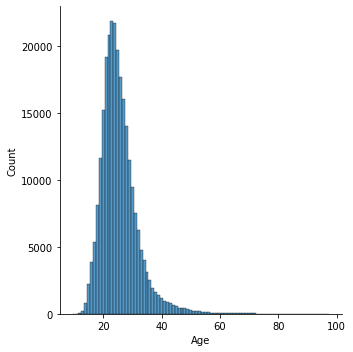

In [39]:
import seaborn as sns

sns.displot(df["Age"], discrete=True)

Just as we have found previously!

So, this brief analysis confirm that, in general, most athletes are very young while competing, relying in their finest physical forms to complete most sports' events. But.. does this result hold for most sports? Is there a sport where seniors compete most?

### Q3.3: What is the distribution of age in various sports?

Now, to answer this one, we must look not only at the most common value, but also other meaningful statistics of Age attribute in various sports

### Q4: Starting in which year did we have brazillians competing?

To solve this one, we now have to resort to filtering techniques:

In [9]:
brazil_competitions = np.sort(df.query('Team=="Brazil"')['Year'].unique())
print(brazil_competitions)

[1900 1920 1924 1932 1936 1948 1952 1956 1960 1964 1968 1972 1976 1980
 1984 1988 1992 1994 1996 1998 2000 2002 2004 2006 2008 2010 2012 2014
 2016]


Brazil started really early, actually in the second modern olympic games, in 1900! Nice!

Also, from 1948 on, Brazil has come to every olympic summer games. From 1994 on, Brazil has come to every olympic winter games. Also interesting!

### Q5.1: Which country has earned more medals in summer games?

This one is probably easy to guess. But let's look what data shows us:



In [14]:
df.query('Season=="Summer" and Medal in ("Gold", "Silver", "Bronze")').groupby(by="Team")['Medal'].count().sort_values(ascending=False)

Team
United States    4686
Soviet Union     2061
Germany          1687
Great Britain    1598
France           1408
                 ... 
Gabon               1
Monaco              1
Mignon-3            1
Bermuda             1
Frimousse           1
Name: Medal, Length: 480, dtype: int64

Yes, it's (as expected) USA the one with more medals! The second one with more medals is Soviet Union. It figures!

### Q5.2: Does USA have more medals because they went to more olympics?

Well, one could say: of course USA has more medals, they have gone to many more olympics, right? Let's see:

In [32]:
df.query('Season=="Summer"').groupby(by="Team")['Year'].count().sort_values(ascending=False)

Team
United States    14526
Great Britain    10309
France           10021
Italy             8051
Germany           7378
                 ...  
Baby-9               1
Cicely-1             1
Turquoise-1          1
Gyp-23               1
Bonaparte            1
Name: Year, Length: 1157, dtype: int64

Yes, USA went to more olympics than any other. Right? Wrong! The snippet above is implicitly counting the number of athletes, not the number of competitions. Let's fix this:

In [49]:
df.query('Season=="Summer"').groupby(by="Team")["Year"].nunique().sort_values(ascending=False)

Team
Greece           29
Switzerland      29
Great Britain    29
France           29
Italy            29
                 ..
Noreg             1
Nora              1
Nokaut II         1
Nirwana           1
30. Februar       1
Name: Year, Length: 1157, dtype: int64

Well, USA is not among the countries which have gone to more olympics. So there must be another reason for having more medals.